<a href="https://colab.research.google.com/github/Anant-0705/07_Health-Risk-Classification_202401100300037/blob/main/07_Health_Risk_Classification_202401100300037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.5
Precision: 0.45897435897435895
Recall: 0.5
F1 Score: 0.4563636363636364

Classification Report:
               precision    recall  f1-score   support

        high       0.50      0.50      0.50         4
         low       0.33      0.14      0.20         7
      medium       0.54      0.78      0.64         9

    accuracy                           0.50        20
   macro avg       0.46      0.47      0.45        20
weighted avg       0.46      0.50      0.46        20



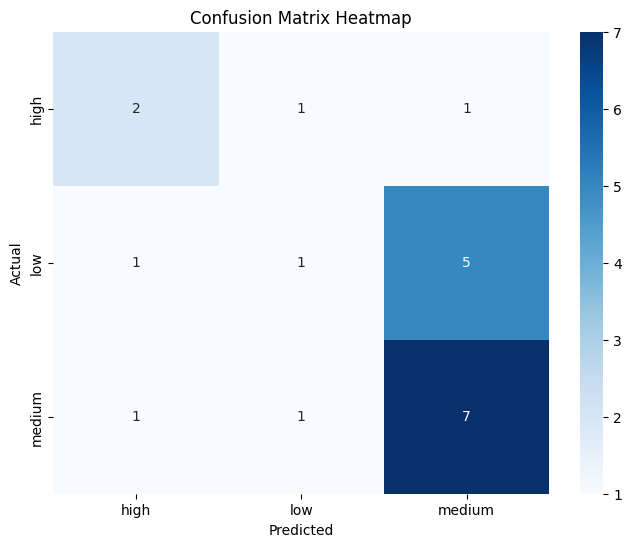

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Load dataset
data = pd.read_csv("/content/health_risk.csv")

# Step 2: Rename columns
data.rename(columns={
    'bmi': 'BMI',
    'exercise_hours': 'Exercise',
    'junk_food_freq': 'Eating_Habits',
    'risk_level': 'Risk_Category'
}, inplace=True)

# Step 3: Encode columns
le_exercise = LabelEncoder()
le_eating = LabelEncoder()
le_risk = LabelEncoder()

data['Exercise'] = le_exercise.fit_transform(data['Exercise'])
data['Eating_Habits'] = le_eating.fit_transform(data['Eating_Habits'])
data['Risk_Category'] = le_risk.fit_transform(data['Risk_Category'])

# Step 4: Split into features and target
X = data[['BMI', 'Exercise', 'Eating_Habits']]
y = data['Risk_Category']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 6: Train RandomForest model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted because multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_risk.classes_))

# Step 9: Confusion Matrix and Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Step 10: Prediction function
def predict_risk(bmi, exercise, eating):
    try:
        ex = le_exercise.transform([exercise])[0]
        eat = le_eating.transform([eating])[0]
    except ValueError as e:
        raise ValueError("Invalid input for exercise or eating habits.") from e

    input_data = [[bmi, ex, eat]]
    pred = model.predict(input_data)[0]
    return le_risk.inverse_transform([pred])[0]
